In [1]:
whos

Interactive namespace is empty.


In [2]:
import os
import glob
import seaborn as sns

In [3]:
P = 613.41875 # from the experimental data

In [4]:
65.**2

4225.0

In [5]:
m = np.linspace(0.01,30,65)
ksat = np.linspace(1,200,65)

In [6]:
ms = []
ks = []

for mm in m:
    for k in ksat:
        ms.append(mm)
        ks.append(k)

In [7]:
ct = 0
for m,k in zip(ms,ks):
    whdr = '-whdr /RHESSys/como_test/worldfiles/como45_AFX_ex.hdr '
    w = '-w /RHESSys/como_test/worldfiles/como45_AFX_ex '
    t = '-t /RHESSys/como_test/tecfiles/sm_ex.tec '
    strt = '-st 2007 10 1 1 '
    nd = '-ed 2008 10 1 1 '
    f = '-r /RHESSys/como_test/flowtables/como45_AFX.flow '
    soil = '-s %s %s '%(str(m),str(k)) # insert the parameter into the line
    flg = '-b -p '
    prog = 'rhessys5.19 '
    pre = '-pre /RHESSys/como_test/out/soil_sense/sens_1_'+str(ct)
    
    cmd = prog+w+whdr+t+strt+nd+f+soil+flg+pre
    print cmd
    print
    os.system(cmd)
    
    ct += 1 # increase the count by one

rhessys5.19 -w /RHESSys/como_test/worldfiles/como45_AFX_ex -whdr /RHESSys/como_test/worldfiles/como45_AFX_ex.hdr -t /RHESSys/como_test/tecfiles/sm_ex.tec -st 2007 10 1 1 -ed 2008 10 1 1 -r /RHESSys/como_test/flowtables/como45_AFX.flow -s 0.01 1.0 -b -p -pre /RHESSys/como_test/out/soil_sense/sens_1_0

rhessys5.19 -w /RHESSys/como_test/worldfiles/como45_AFX_ex -whdr /RHESSys/como_test/worldfiles/como45_AFX_ex.hdr -t /RHESSys/como_test/tecfiles/sm_ex.tec -st 2007 10 1 1 -ed 2008 10 1 1 -r /RHESSys/como_test/flowtables/como45_AFX.flow -s 0.01 4.109375 -b -p -pre /RHESSys/como_test/out/soil_sense/sens_1_1

rhessys5.19 -w /RHESSys/como_test/worldfiles/como45_AFX_ex -whdr /RHESSys/como_test/worldfiles/como45_AFX_ex.hdr -t /RHESSys/como_test/tecfiles/sm_ex.tec -st 2007 10 1 1 -ed 2008 10 1 1 -r /RHESSys/como_test/flowtables/como45_AFX.flow -s 0.01 7.21875 -b -p -pre /RHESSys/como_test/out/soil_sense/sens_1_2

rhessys5.19 -w /RHESSys/como_test/worldfiles/como45_AFX_ex -whdr /RHESSys/como_test/w

In [27]:
files = glob.glob('/RHESSys/como_test/out/soil_sense/sens_1_*_basin.daily') # grab the files

In [28]:
data = pd.DataFrame({'files':files})

In [29]:
fl = files[0]

In [32]:
int(fl.split('_')[-2])

0

In [33]:
def get_idx(fl):
    return int(fl.split('_')[-2])

In [34]:
data['idx'] = data.files.map(get_idx)

In [37]:
data.sort(columns='idx', inplace=True)

In [39]:
data['ksat'] = ks
data['m'] = ms

In [19]:
def computeQ(fl):
    tmp = pd.read_table(fl, delim_whitespace=True)
    return tmp.streamflow.sum()

In [20]:
def computeQbf(fl):
    tmp = pd.read_table(fl, delim_whitespace=True)
    return tmp.baseflow.sum()

In [21]:
def computeET(fl):
    tmp = pd.read_table(fl, delim_whitespace=True)
    tmp['ET'] = tmp['trans']+tmp['evap']
    return tmp.ET.sum()

In [22]:
def computeET(fl):
    tmp = pd.read_table(fl, delim_whitespace=True)
    tmp['ET'] = tmp['trans']+tmp['evap']
    return tmp.ET.sum()

In [40]:
data['Q'] = data.files.map(computeQ)

In [13]:
data['Qbf'] = data.files.map(computeQbf)

In [22]:
data['ET'] = data.files.map(computeET)

In [41]:
data['P'] = P

In [43]:
data['RR'] = data.Q/data.P

In [16]:
data['RRbf'] = data.Qbf/data.P

In [23]:
data['Qerr'] = data['Qbf']-data['Q']

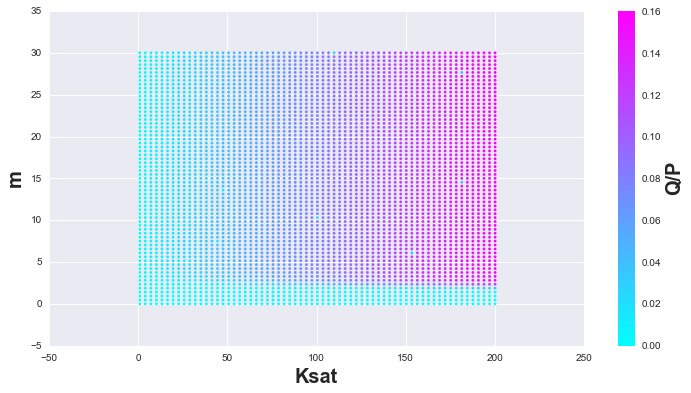

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(data['ksat'],data['m'], s = 8, c = data.RR, edgecolor='none', cmap='cool')
c=plt.colorbar()
plt.xlabel('Ksat', fontsize=20, weight='bold')
plt.ylabel('m', fontsize=20, weight='bold')
c.set_label('Q/P', fontsize=20, weight='bold')

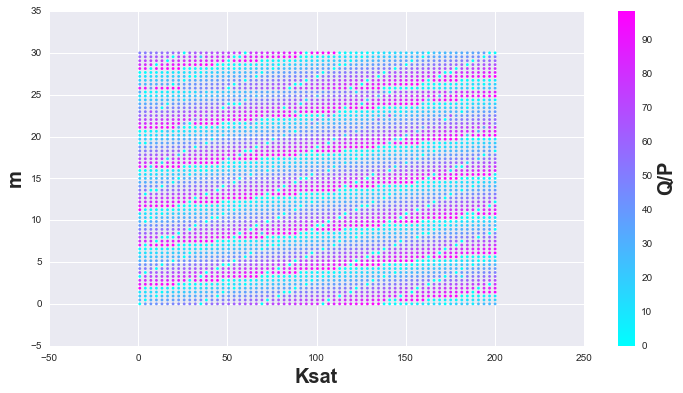

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(data['ksat'],data['m'], s = 8, c = data.Qbf, edgecolor='none', cmap='cool')
c=plt.colorbar()
plt.xlabel('Ksat', fontsize=20, weight='bold')
plt.ylabel('m', fontsize=20, weight='bold')
c.set_label('Q/P', fontsize=20, weight='bold')

In [20]:
data.head(20)

,files,ksat,m,Q,Qbf,P,RR,RRbf
0,/RHESSys/como_test/out/soil_sense/sens_1_0_bas...,1.000000,0.01,0.000000,0.000000,613.41875,0.000000,0.000000
1,/RHESSys/como_test/out/soil_sense/sens_1_1000_...,4.109375,0.01,38.986839,38.986839,613.41875,0.063557,0.063557
2,/RHESSys/como_test/out/soil_sense/sens_1_1001_...,7.218750,0.01,40.524160,40.524160,613.41875,0.066063,0.066063
3,/RHESSys/como_test/out/soil_sense/sens_1_1002_...,10.328125,0.01,42.061495,42.061495,613.41875,0.068569,0.068569
4,/RHESSys/como_test/out/soil_sense/sens_1_1003_...,13.437500,0.01,43.598831,43.598831,613.41875,0.071075,0.071075
5,/RHESSys/como_test/out/soil_sense/sens_1_1004_...,16.546875,0.01,45.136166,45.136166,613.41875,0.073581,0.073581
6,/RHESSys/como_test/out/soil_sense/sens_1_1005_...,19.656250,0.01,46.655586,46.655586,613.41875,0.076058,0.076058
7,/RHESSys/como_test/out/soil_sense/sens_1_1006_...,22.765625,0.01,48.192837,48.192837,613.41875,0.078564,0.078564
8,/RHESSys/como_test/out/soil_sense/sens_1_1007_...,25.875000,0.01,49.730113,49.730113,613.41875,0.081070,0.081070
9,/RHESSys/como_test/out/soil_sense/sens_1_1008_...,28.984375,0.01,51.267449,51.267449,613.41875,0.083577,0.083577


## Now compare with GW on and off

In [120]:
whdr = '-whdr /RHESSys/ComoCreek_new/worldfiles/world.como.lai.hdr '
w = '-w /RHESSys/ComoCreek_new/worldfiles/world.AFX.Y2008M10D1H1.state '
t = '-t /RHESSys/ComoCreek_new/tecfiles/snow.tec '
strt = '-st 2003 10 1 1 '
nd = '-ed 2008 10 1 1 '
f = '-r /RHESSys/ComoCreek_new/flowtables/AFX.flow '
soil = '-s 15 15 '
flg = '-b '
prog = 'rhessys5.19 '
pre = '-pre /RHESSys/ComoCreek_new/out/soil_sens/sens_5_1'

cmd = prog+w+whdr+t+strt+nd+f+soil+flg+pre
print cmd
print
os.system(cmd)

rhessys5.19 -w /RHESSys/ComoCreek_new/worldfiles/world.AFX.Y2008M10D1H1.state -whdr /RHESSys/ComoCreek_new/worldfiles/world.como.lai.hdr -t /RHESSys/ComoCreek_new/tecfiles/snow.tec -st 2003 10 1 1 -ed 2008 10 1 1 -r /RHESSys/ComoCreek_new/flowtables/AFX.flow -s 15 15 -b -pre /RHESSys/ComoCreek_new/out/soil_sens/sens_5_1



0

In [57]:
gw = pd.read_table('/RHESSys/ComoCreek_new/out/soil_sens/sens_2_1_basin.daily', delim_whitespace=True)
nogw = pd.read_table('/RHESSys/ComoCreek_new/out/soil_sens/sens_2_2_basin.daily', delim_whitespace=True)

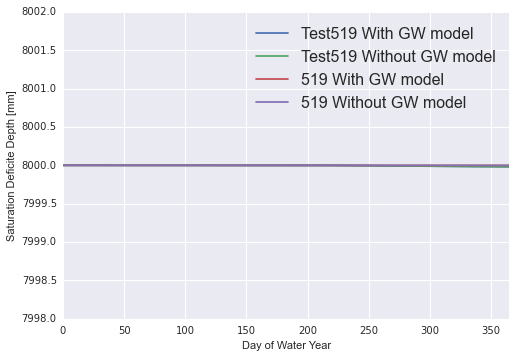

In [92]:
plt.plot(gw.sat_def_z)
plt.plot(nogw.sat_def_z)
plt.plot(gw2.sat_def_z)
plt.plot(nogw2.sat_def_z)
plt.xlabel('Day of Water Year')
plt.ylabel('Saturation Deficite Depth [mm]')
plt.legend(['Test519 With GW model', 'Test519 Without GW model','519 With GW model', '519 Without GW model'], loc = 'best', fontsize = 16)
plt.xlim(0,365)
plt.ylim(7998,8002)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

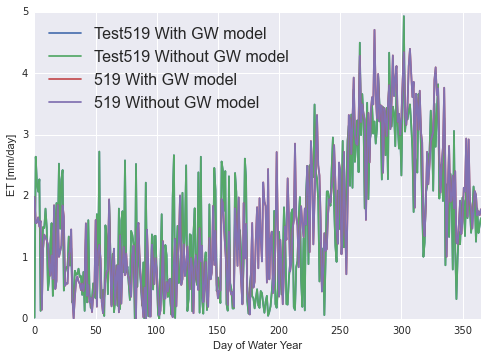

In [100]:
plt.plot(gw.evap+gw.trans)
plt.plot(nogw.evap+nogw.trans)
plt.plot(gw2.evap+gw2.trans)
plt.plot(nogw2.evap+nogw2.trans)
plt.xlabel('Day of Water Year')
plt.ylabel('ET [mm/day]')
plt.legend(['Test519 With GW model', 'Test519 Without GW model','519 With GW model', '519 Without GW model'], loc = 'best', fontsize = 16)
plt.xlim(0,365)
#plt.ylim(7998,8002)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

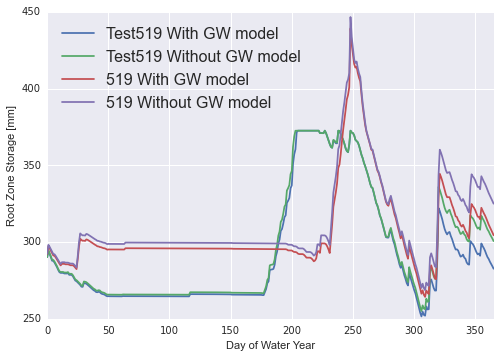

In [103]:
plt.plot(gw.rz_storage)
plt.plot(nogw.rz_storage)
plt.plot(gw2.rz_storage)
plt.plot(nogw2.rz_storage)
plt.xlabel('Day of Water Year')
plt.ylabel('Root Zone Storage [mm]')
plt.legend(['Test519 With GW model', 'Test519 Without GW model','519 With GW model', '519 Without GW model'], loc = 'best', fontsize = 16)
plt.xlim(0,365)
#plt.ylim(7998,8002)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

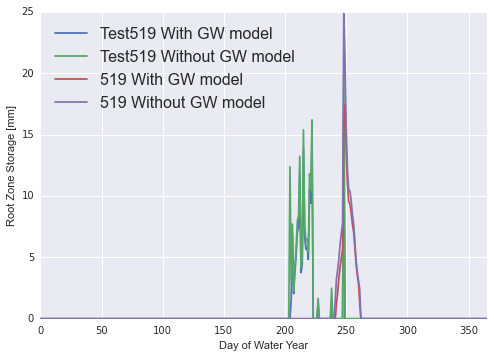

In [104]:
plt.plot(gw.rz_drainage)
plt.plot(nogw.rz_drainage)
plt.plot(gw2.rz_drainage)
plt.plot(nogw2.rz_drainage)
plt.xlabel('Day of Water Year')
plt.ylabel('Root Zone Storage [mm]')
plt.legend(['Test519 With GW model', 'Test519 Without GW model','519 With GW model', '519 Without GW model'], loc = 'best', fontsize = 16)
plt.xlim(0,365)
#plt.ylim(7998,8002)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

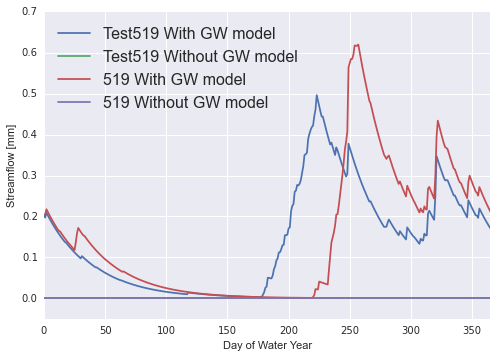

In [107]:
plt.plot(gw.streamflow)
plt.plot(nogw.streamflow)
plt.plot(gw2.streamflow)
plt.plot(nogw2.streamflow)
plt.xlabel('Day of Water Year')
plt.ylabel('Streamflow [mm]')
plt.legend(['Test519 With GW model', 'Test519 Without GW model','519 With GW model', '519 Without GW model'], loc = 'best', fontsize = 16)
plt.xlim(0,365)
plt.ylim(-0.05,0.7)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

In [121]:
tmp = pd.read_table('/RHESSys/ComoCreek_new/out/soil_sens/sens_5_1_basin.daily', delim_whitespace=True)

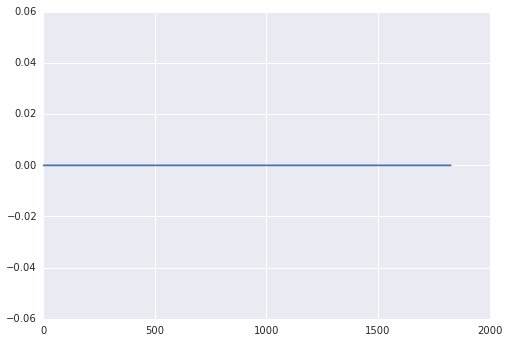

In [122]:
plt.plot(tmp.streamflow)

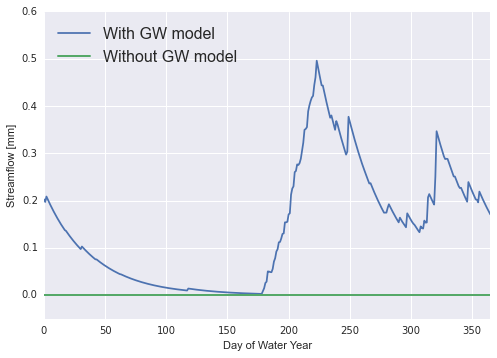

In [82]:
plt.plot(gw.streamflow)
plt.plot(nogw.streamflow, lw = 2)
plt.ylim(-0.05,0.6)
plt.xlim(0,365)
plt.ylabel('Streamflow [mm]')
plt.xlabel('Day of Water Year')
plt.legend(['Test519 With GW model', 'Test519 Without GW model','519 With GW model', '519 Without GW model'], loc = 'best', fontsize = 16)

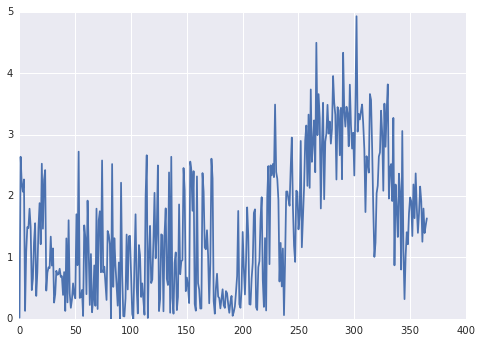

In [56]:
plt.plot(gw.evap+gw.trans)

In [90]:
gw2 = pd.read_table('/RHESSys/ComoCreek_new/out/soil_sens/sens_4_1_basin.daily', delim_whitespace=True)
nogw2 = pd.read_table('/RHESSys/ComoCreek_new/out/soil_sens/sens_4_2_basin.daily', delim_whitespace=True)

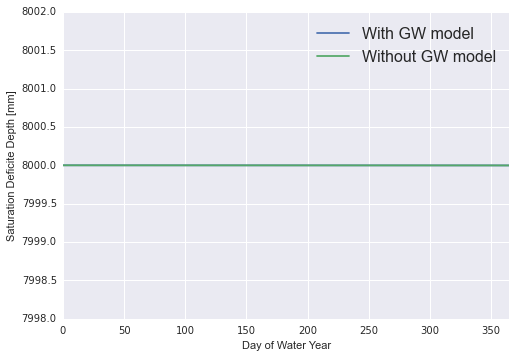

In [91]:
plt.plot(gw2.sat_def_z)
plt.plot(nogw2.sat_def_z,'-')
plt.xlabel('Day of Water Year')
plt.ylabel('Saturation Deficite Depth [mm]')
plt.legend(['With GW model', 'Without GW model'], loc = 'best', fontsize = 16)
plt.xlim(0,365)
plt.ylim(7998,8002)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

## Test a suite of GW1 and GW2 variables

In [29]:
gw1 = np.linspace(0.001,0.3,33)
gw2 = np.linspace(0.01,0.9,33)

In [30]:
gw1s = []
gw2s = []

for g1 in gw1:
    for g2 in gw2:
        gw1s.append(g1)
        gw2s.append(g2)

In [31]:
ct = 0
for g1,g2 in zip(gw1s,gw2s):
    whdr = '-whdr /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm.hdr '
    w = '-w /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm '
    t = '-t /RHESSys/ComoCreek_new/tecfiles/sm.tec '
    strt = '-st 2007 10 1 1 '
    nd = '-ed 2008 10 1 1 '
    f = '-r /RHESSys/ComoCreek_new/flowtables/AFX.flow '
    soil = '-s 15 15 -gw %s %s '%(str(g1),str(g2)) # insert the parameter into the line
    flg = '-b '
    prog = 'rhessys5.19.test '
    pre = '-pre /RHESSys/ComoCreek_new/out/soil_sens/sens_3_'+str(ct)
    
    cmd = prog+w+whdr+t+strt+nd+f+soil+flg+pre
    print cmd
    print
    os.system(cmd)
    
    ct += 1 # increase the count by one

rhessys5.19.test -w /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm -whdr /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm.hdr -t /RHESSys/ComoCreek_new/tecfiles/sm.tec -st 2007 10 1 1 -ed 2008 10 1 1 -r /RHESSys/ComoCreek_new/flowtables/AFX.flow -s 15 15 -gw 0.001 0.01 -b -pre /RHESSys/ComoCreek_new/out/soil_sens/sens_3_0

rhessys5.19.test -w /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm -whdr /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm.hdr -t /RHESSys/ComoCreek_new/tecfiles/sm.tec -st 2007 10 1 1 -ed 2008 10 1 1 -r /RHESSys/ComoCreek_new/flowtables/AFX.flow -s 15 15 -gw 0.001 0.0378125 -b -pre /RHESSys/ComoCreek_new/out/soil_sens/sens_3_1

rhessys5.19.test -w /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm -whdr /RHESSys/ComoCreek_new/worldfiles/world.AFX.sm.hdr -t /RHESSys/ComoCreek_new/tecfiles/sm.tec -st 2007 10 1 1 -ed 2008 10 1 1 -r /RHESSys/ComoCreek_new/flowtables/AFX.flow -s 15 15 -gw 0.001 0.065625 -b -pre /RHESSys/ComoCreek_new/out/soil_sens/sens_3_2

rhessys5.19.test -w /R

In [32]:
files = glob.glob('/RHESSys/ComoCreek_new/out/soil_sens/sens_3_*_basin.daily') # grab the files

In [33]:
data = pd.DataFrame({'files':files,'gw1':gw1s,'gw2':gw2s})

In [34]:
data['Q'] = data.files.map(computeQ)

In [35]:
data['P'] = P

In [36]:
data['RR'] = data.Q/data.P

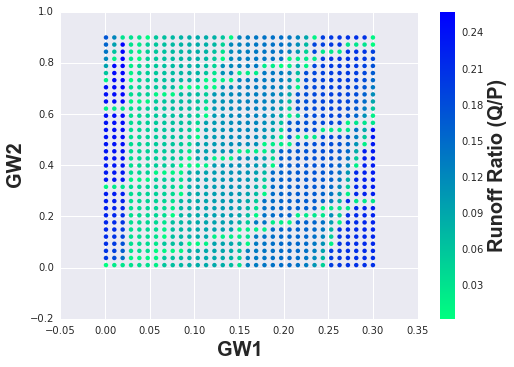

In [43]:
plt.scatter(data['gw1'],data['gw2'], s = 20, c = data.RR, edgecolor='none',cmap='winter_r')
c= plt.colorbar()
plt.xlabel('GW1', fontsize=20,weight='bold')
plt.ylabel('GW2', fontsize=20,weight='bold')
c.set_label('Runoff Ratio (Q/P)', fontsize = 20, weight='bold')